# Concrete section properties according to CSCR 2010/14 and ACI 318-19

This example demonstrates how to create a simple reinforced concrete cross-section and obtain the gross area properties. We start by importing the necessary modules.

In [1]:
from sectionproperties.pre.library import concrete_rectangular_section

from concreteproperties import (
    Concrete,
    ConcreteLinear,
    ConcreteSection,
    RectangularStressBlock,
    SteelBar,
    SteelElasticPlastic,
)

## Assign Materials

The materials used in this example will be 32 MPa concrete and 500 MPa steel, specified in accordance with AS 3600:2018.

In [2]:
concrete = Concrete(
    name="32 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30.1e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=32,
        alpha=0.802,
        gamma=0.89,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.4,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

## Create Geometry and Concrete Section

The section being analysed in this example is a 600D x 400W rectangular beam. The reinforcement detailed is 3N20 top bars and 3N24 bottom bars, with 30 mm of cover. The geometry is generated using the *sectionproperties* concrete sections library.

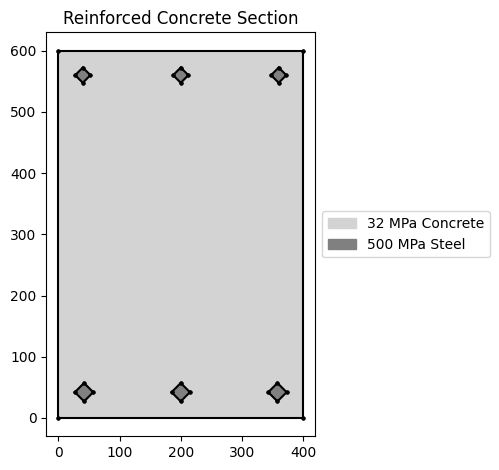

<Axes: title={'center': 'Reinforced Concrete Section'}>

In [3]:
geom = concrete_rectangular_section(
    d=600,
    b=400,
    dia_top=20,
    area_top=310,
    n_top=3,
    c_top=30,
    dia_bot=24,
    area_bot=450,
    n_bot=3,
    c_bot=30,
    conc_mat=concrete,
    steel_mat=steel,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()

## Gross Properties

Creating a ``ConcreteSection`` object automatically calculates the gross area properties of the reinforced concrete cross-section. These can be obtained by using the ``get_gross_properties()`` method. The section properties can be printed by calling the ``print_results()`` method.

In [4]:
gross_props = conc_sec.get_gross_properties()
gross_props.print_results(fmt=".3e")

    Gross Concrete Section Properties     
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Property                  ┃      Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Total Area                │  2.400e+05 │
│ Concrete Area             │  2.377e+05 │
│ Lumped Reinforcement Area │  2.280e+03 │
│ Axial Rigidity (EA)       │  7.611e+09 │
│ Mass (per unit length)    │  5.884e-01 │
│ Perimeter                 │  2.000e+03 │
│ E.Qx                      │  2.265e+12 │
│ E.Qy                      │  1.522e+12 │
│ x-Centroid                │  2.000e+02 │
│ y-Centroid                │  2.976e+02 │
│ x-Centroid (Gross)        │  2.000e+02 │
│ y-Centroid (Gross)        │  3.000e+02 │
│ E.Ixx_g                   │  9.168e+14 │
│ E.Iyy_g                   │  4.073e+14 │
│ E.Ixy_g                   │  4.531e+14 │
│ E.Ixx_c                   │  2.426e+14 │
│ E.Iyy_c                   │  1.028e+14 │
│ E.Ixy_c                   │ -1.875e-01 │
│ E.I11                     │  2.426e+14 │
│ E.I22                     │  1.028e+14 │
│ Principal Axis Angle      │  0.000e+00 │
│ E.Zxx+                    │  8.024e+11 │
│ E.Zxx-                    │  8.153e+11 │
│ E.Zyy+                    │  5.142e+11 │
│ E.Zyy-                    │  5.142e+11 │
│ E.Z11+                    │  8.024e+11 │
│ E.Z11-                    │  8.153e+11 │
│ E.Z22+                    │  5.142e+11 │
│ E.Z22-                    │  5.142e+11 │
│ Ultimate Concrete Strain  │  3.000e-03 │
└───────────────────────────┴────────────┘

## Transformed Properties

The above section properties are multiplied by the elastic moduli, e.g. axial rigidity (``EA``) and flexural rigidity (``EI``). Transformed section properties can be obtained using ``get_transformed_gross_properties()`` and providing a reference ``elastic_modulus``.

In [5]:
transformed_props = conc_sec.get_transformed_gross_properties(elastic_modulus=30.1e3)
transformed_props.print_results(fmt=".3e")

    Transformed Gross    
    Concrete Section     
       Properties        
┏━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Property ┃      Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━┩
│ E_ref    │  3.010e+04 │
│ Area     │  2.529e+05 │
│ Qx       │  7.526e+07 │
│ Qy       │  5.057e+07 │
│ Ixx_g    │  3.046e+10 │
│ Iyy_g    │  1.353e+10 │
│ Ixy_g    │  1.505e+10 │
│ Ixx_c    │  8.061e+09 │
│ Iyy_c    │  3.417e+09 │
│ Ixy_c    │ -6.229e-06 │
│ I11      │  8.061e+09 │
│ I22      │  3.417e+09 │
│ Zxx+     │  2.666e+07 │
│ Zxx-     │  2.708e+07 │
│ Zyy+     │  1.708e+07 │
│ Zyy-     │  1.708e+07 │
│ Z11+     │  2.666e+07 │
│ Z11-     │  2.708e+07 │
│ Z22+     │  1.708e+07 │
│ Z22-     │  1.708e+07 │
└──────────┴────────────┘